In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Cleaning

In [4]:
df[df.duplicated(keep = 'last', subset = None)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [5]:
df[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df.drop(index = [581], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.9+ KB


In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

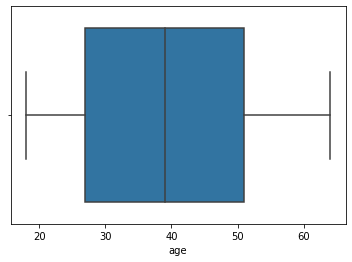

In [12]:
sns.boxplot(df['age'])
plt.show()

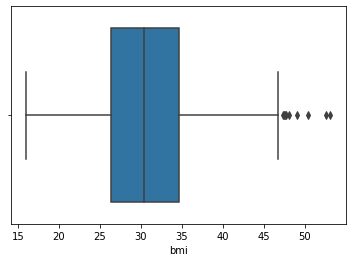

In [13]:
sns.boxplot(df['bmi'])
plt.show()

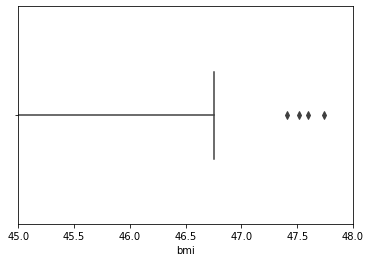

In [14]:
sns.boxplot(df['bmi'])
plt.xlim(45, 48)
plt.show()

In [15]:
df[df['bmi'] > 47]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


<AxesSubplot:xlabel='region', ylabel='bmi'>

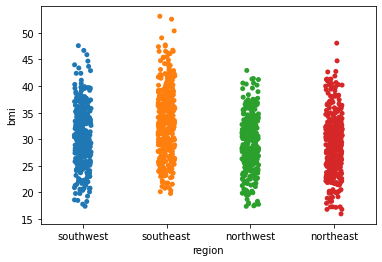

In [16]:
sns.stripplot(df['region'], df['bmi'])

bmi vary based on region so lets handle outlier accordingly

In [17]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
southwest_bmi = df[(df['region'] == 'southwest') & (df['bmi'] < 47)]['bmi'].mean()
southeast_bmi = df[(df['region'] == 'southeast') & (df['bmi'] < 47)]['bmi'].mean()
northwest_bmi = df[(df['region'] == 'northwest') & (df['bmi'] < 47)]['bmi'].mean()
northeast_bmi = df[(df['region'] == 'northeast') & (df['bmi'] < 47)]['bmi'].mean()

In [19]:
def replace_bmi(col):
    region = col[0]
    bmi = col[1]
    if bmi > 47:
        if region == 'southwest':
            return southwest_bmi
        elif region == 'southeast':
            return southeast_bmi
        elif region == 'northwest':
            return northwest_bmi
        else:
            return northeast_bmi
    else:
        return bmi

In [20]:
df['bmi'] = df[['region', 'bmi']].apply(replace_bmi, axis = 1)

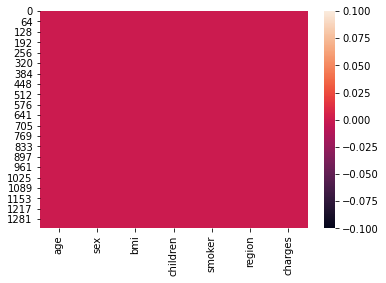

In [21]:
sns.heatmap(df.isnull())
plt.show()

### EDA

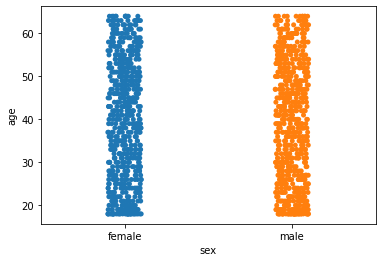

In [22]:
sns.stripplot(df['sex'], df['age'])
plt.show()

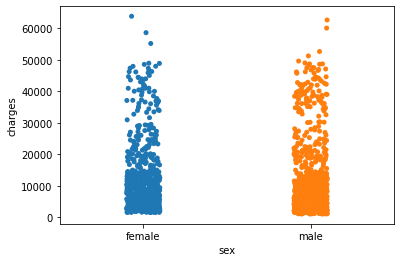

In [23]:
sns.stripplot(df['sex'], df['charges'])
plt.show()

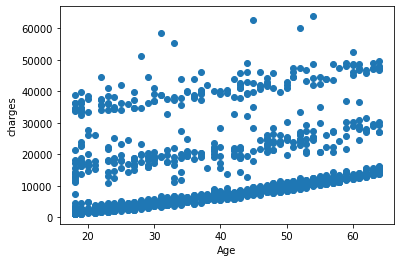

In [24]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

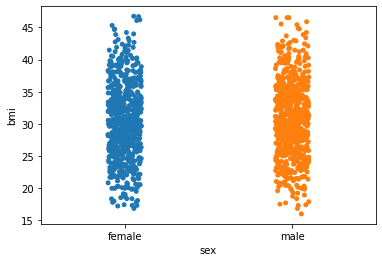

In [25]:
sns.stripplot(df['sex'], df['bmi'])
plt.show()

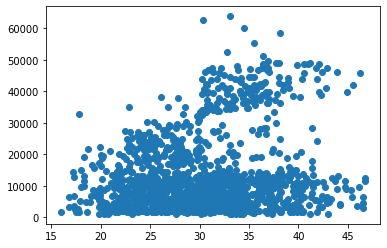

In [26]:
plt.scatter(df['bmi'], df['charges'])

<BarContainer object of 1337 artists>

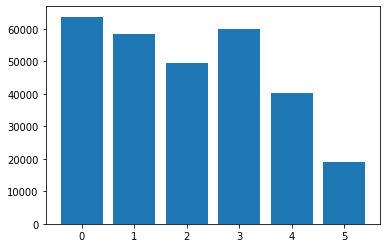

In [27]:
plt.bar(df['children'], df['charges'])

In [28]:
smoker_yes = df[df['smoker'] == 'yes']
smoker_no = df[df['smoker'] == 'no']

In [29]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

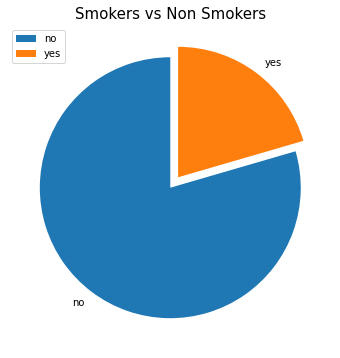

In [30]:
plt.figure(figsize = (8, 6))
plt.pie(df['smoker'].value_counts().values, labels = list(df['smoker'].value_counts().index), startangle=90, explode = [0, .1])
plt.title('Smokers vs Non Smokers', size = 15)
plt.legend()
plt.show()

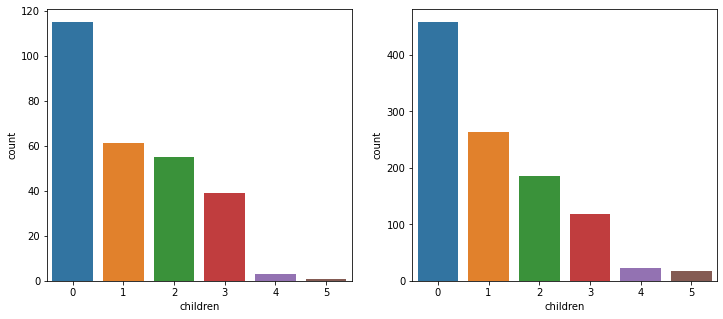

In [31]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.countplot(smoker_yes['children'])

plt.subplot(1, 2, 2)
sns.countplot(smoker_no['children'])
plt.show()

smoker has less 4, 5 childrens when compared to no smokers

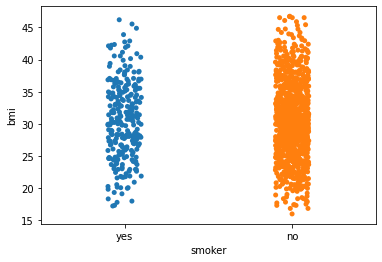

In [32]:
sns.stripplot(df['smoker'], df['bmi'])
plt.show()

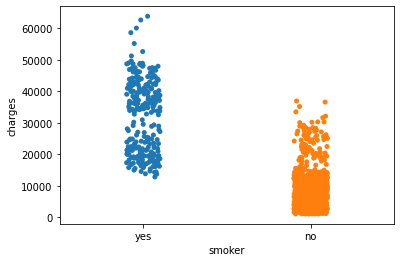

In [33]:
sns.stripplot(df['smoker'], df['charges'])
plt.show()

Smokers insured higher than non smokers

In [34]:
pd.crosstab(df['smoker'], df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


<AxesSubplot:xlabel='region', ylabel='charges'>

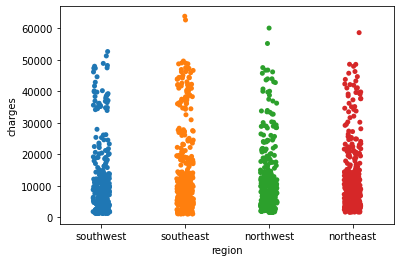

In [35]:
sns.stripplot(df['region'], df['charges'])

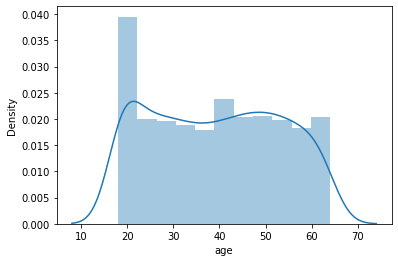

In [36]:
sns.distplot(df['age'])
plt.show()

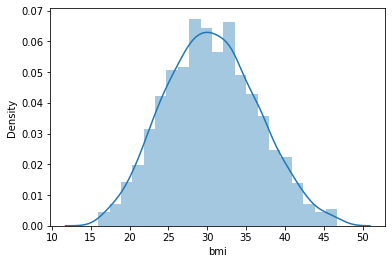

In [37]:
sns.distplot(df['bmi'])
plt.show()

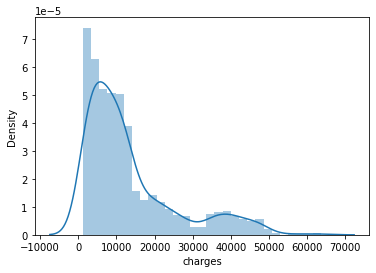

In [38]:
sns.distplot(df['charges'])
plt.show()

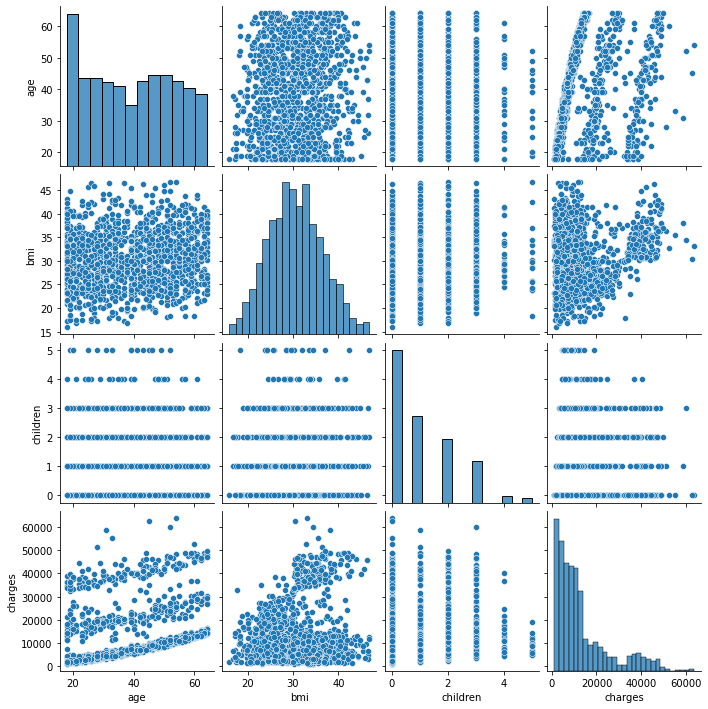

In [39]:
sns.pairplot(df)
plt.show()

### Encoding

In [40]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [41]:
df['sex'] = df['sex'].replace({
    'male':1,
    'female':0
})

In [42]:
df['smoker'] = df['smoker'].replace({
    'yes':1,
    'no':0
})

In [43]:
regions = pd.get_dummies(df['region'], drop_first= True)

In [44]:
df_new = pd.concat([df, regions], axis = 1)

In [45]:
df_new.head(2)

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.90,0,1,southwest,16884.9240,0,0,1
1,18,1,33.77,1,0,southeast,1725.5523,0,1,0


In [46]:
df_new.drop(['region'], axis = 1, inplace = True)

In [47]:
df_new.head(2)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
1,18,1,33.77,1,0,1725.5523,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df_new.drop(['charges'], axis = 1).copy()
y = df_new['charges'].copy()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr_model = LinearRegression()

In [53]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [54]:
pred_lr = lr_model.predict(X_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
np.sqrt(mean_squared_error(y_test, pred_lr))

6470.012033565345

In [57]:
r2_score(y_test, pred_lr)

0.7511670720659911

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
sc = MinMaxScaler()

In [60]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [61]:
lr_model.fit(X_train_sc, y_train)

LinearRegression()

In [62]:
predicted_vals = lr_model.predict(X_test_sc)

In [63]:
r2_score(y_test, predicted_vals)

0.7511670720659912

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
d_tree = DecisionTreeRegressor()

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf_reg = RandomForestRegressor()

In [68]:
from sklearn.svm import SVR

In [69]:
sv = SVR()

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
knn = KNeighborsRegressor()

In [72]:
model_names = ['d_tree', 'rf', 'svr', 'knn']
models = [d_tree, rf_reg, sv, knn]
r2vals = []
for model in models:
    model.fit(X_train_sc, y_train)
    pred = model.predict(X_test_sc)
    r_sc = r2_score(y_test, pred)
    r2vals.append(r_sc)

ans_df = pd.DataFrame({'r2_score':r2vals}, index = model_names)
ans_df

,r2_score
d_tree,0.742931
rf,0.836120
svr,-0.119130
knn,0.781784


We have a good value with Random forest regressor

In [73]:
rf_reg.feature_importances_

array([0.12745474, 0.00500817, 0.20681631, 0.01684473, 0.62875719,
       0.00567435, 0.00546703, 0.00397746])

In [74]:
f_imp = pd.DataFrame({'imp': rf_reg.feature_importances_}, index = X.columns)
f_imp = f_imp.sort_values(by = 'imp', ascending= False)
f_imp

,imp
smoker,0.628757
bmi,0.206816
age,0.127455
children,0.016845
northwest,0.005674
southeast,0.005467
sex,0.005008
southwest,0.003977


In [75]:
r2_list = []
cols = []
for i in range(len(f_imp.index), 0, -1):
    f_col = list(f_imp.index[:i])
    cols.append(str(f_col))
    X = df_new[f_col].copy()
    y = df_new['charges'].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_sc, y_train)
    pred = rf_model.predict(X_test_sc)
    r2 = r2_score(y_test, pred)
    r2_list.append(r2)
    
dd = pd.DataFrame({'r2':r2_list}, index = cols)
dd = dd.sort_values(by = 'r2', ascending = False)
dd.head(1)

,r2
"['smoker', 'bmi', 'age', 'children', 'northwest', 'southeast', 'sex']",0.840921
